In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns ; sns.set()

from google.colab import drive
drive.mount('/content/drive')

sys.path.append("/content/drive/MyDrive/GSOC-NMR-project/Work/Notebooks")
from auxillary_functions import *
from polynomial_featextract import poly_featextract

Mounted at /content/drive


In [2]:
# import raw data and params.txt file
datadir_path = "/content/drive/MyDrive/GSOC-NMR-project/Work/Data/2021-06-21_classify_datagen_all_funcs"

rawdata = load_data(datadir_path)
params = load_params(datadir_path)
ker_integrals = load_wlist(datadir_path) # load wlist.txt file

# Stencil type : {'0' : 'Gaussian', '1' : 'Power Law', '2' : 'RKKY'}

Finished loading rawdata into numpy array
Finsihed loading parameters file
finished loading kernel-integrals file.


In [3]:
print(rawdata.shape)
offset = 150
shifted_data, center = get_window(rawdata,2/3,width=offset)
print("The Echo pulse occurs at timestep:",center)

# Rescaled data
rscl_data = shifted_data / np.max(shifted_data,axis=1,keepdims=True)

(10500, 943)
The Echo pulse occurs at timestep: 628


In [4]:
y_classes = get_yclasses(params, ker_integrals)

In [5]:
y_classes.head()

,αx,αz,len_scale
0,0.000140,0.004113,3.471444
1,0.000288,0.005442,2.838588
2,0.000948,0.000869,4.783256
3,0.008380,0.014527,1.950423
4,0.000710,0.013350,1.764475


In [6]:
rawdata_norm = rawdata[:,:-1]/ np.max(rawdata[:,:-1],axis=1,keepdims=True)

## Echo Pulse plot

## Spin Echo curves Plot

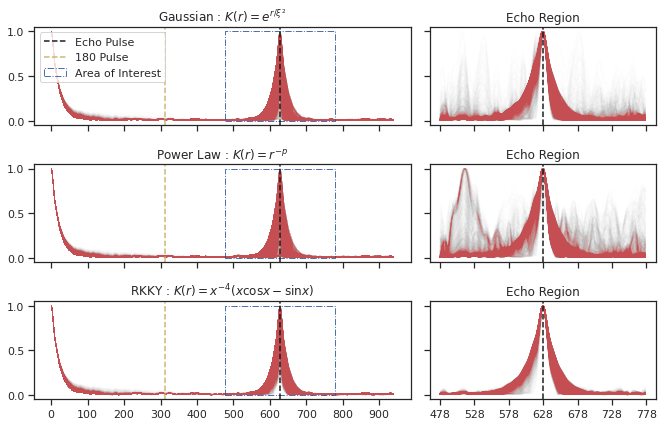

In [ ]:
sns.set_style('ticks')
fig, axes = plt.subplots(nrows=3,ncols=2,gridspec_kw={'width_ratios': [2, 1.2]},
                         sharex="col",sharey=True, figsize=(10,7))

titles=[r"Gaussian : $K(r) = e^{{r/ \xi}^2}$",
        r"Power Law : $K(r) = r^{-p}$",
        r"RKKY : $K(r) = x^{-4}(x\cos{x} - \sin{x})$"]

for idx in range(3):
    for full_ts, capped_ts in zip(rawdata_norm[params["stencil_type"] == idx,:-1], rscl_data[params["stencil_type"] == idx,:]):
        axes[idx,0].plot(full_ts,'r',alpha=0.002)
        axes[idx,1].plot(capped_ts,'r',alpha=0.005)
    
    # Left Panel 
    axes[idx,0].axvline(x=int(2/3 * len(full_ts)),color='k', ls='--', label='Echo Pulse')
    axes[idx,0].axvline(x=int(1/3 * len(full_ts)),color='y', ls='--', label='180 Pulse')

    rect = Rectangle((628-150, 0), 300, 1, linewidth=1,
                             edgecolor='b', facecolor='none', ls='-.',
                             label='Area of Interest')
    axes[idx, 0].set(title=titles[idx], xticks= np.arange(0,940,100))
    axes[idx, 0].add_patch(rect)
    axes[0, 0].legend(loc="upper left")

    
    # Right Panel
    axes[idx, 1].axvline(x=150,color='k', ls='--', label='Echo Pulse')
    #axes[idx, 1].legend(loc="upper left")
    axes[idx, 1].set(xticks= np.arange(0,301,50),
                     xticklabels= np.arange(628-150,628+151,50),
                     title="Echo Region")

#plt.suptitle("Spin Echo Curves based on Radial Kernel types "+ r"$\kappa (r)$", fontsize=18)


fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.grid(False)
plt.axis('off')
plt.xlabel(r"Time $\mu$s", fontsize=16)
plt.ylabel(r"Magnetization |M|", fontsize=16)


plt.tight_layout(rect=[0,0.1,0.95,0.97])
plt.show()

# One full-ts plot with 3 inline figures

In [41]:
1/3 * len(rawdata_norm[0])

314.0

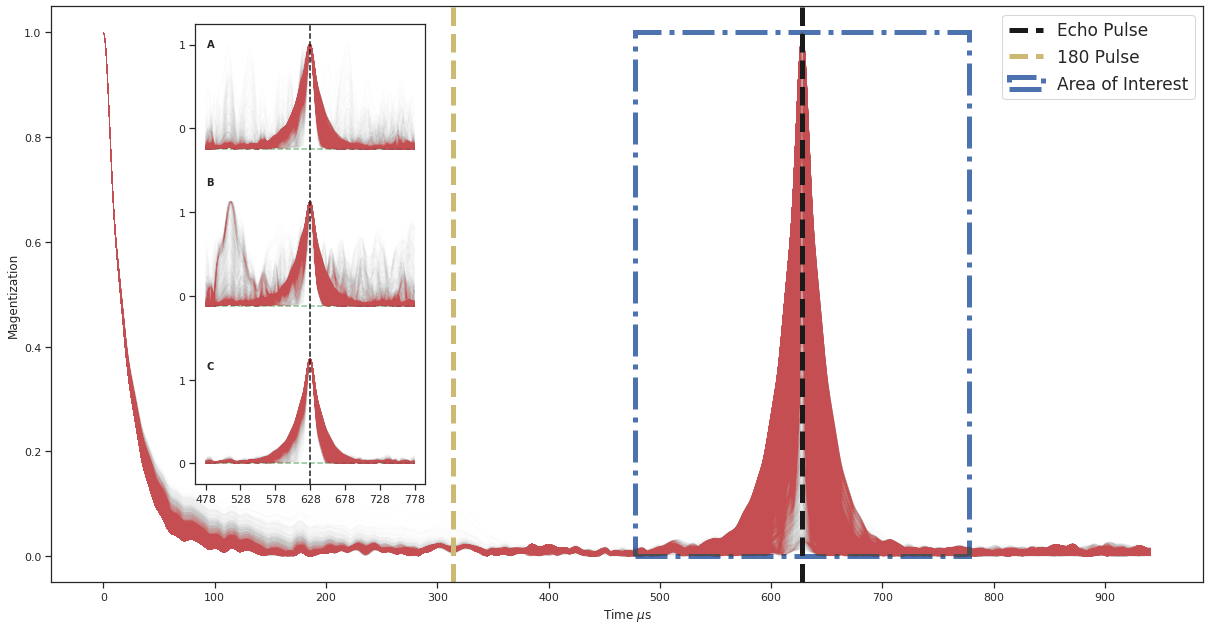

In [120]:
sns.set_style('ticks')

fig = plt.figure(figsize=(16,8))

titles=[r"Gaussian : $K(r) = e^{{r/ \xi}^2}$",
        r"Power Law : $K(r) = r^{-p}$",
        r"RKKY : $K(r) = x^{-4}(x\cos{x} - \sin{x})$"]

ax1 = fig.add_axes([0.,0.,1.,1.])

# ax2 = fig.add_axes([0.2,0.75,0.2,0.2])
# ax3 = fig.add_axes([0.2,0.45,0.2,0.2])
# ax4 = fig.add_axes([0.2,0.15,0.2,0.2])
# axes=[ax2,ax3,ax4]

ax2 = fig.add_axes([0.125, 0.17, 0.2, 0.8])

#Ax1
for curve in rawdata_norm:
    ax1.plot(curve, color='r', alpha=0.002)

rect = Rectangle((628-150, 0), 300, 1, linewidth=1,
                             edgecolor='b', facecolor='none', ls='-.', lw=5,
                             label='Area of Interest')
ax1.add_patch(rect)
ax1.axvline(x=628,color='k', ls='--', lw=5, label='Echo Pulse')
ax1.axvline(x=314,color='y', ls='--', lw=5, label='180 Pulse')
ax1.set(xticks= np.arange(0,940,100), xlabel=r"Time $\mu$s", ylabel="Magentization")
ax1.legend(loc="upper right", prop={'size':17})

# Axes 2
y_ax = [0,-1.5,-3]
for stencil_type in range(3):
    for curve in rscl_data[params["stencil_type"] == stencil_type,:]:
        ax2.plot(curve+y_ax[stencil_type], 'r', alpha=0.005)

ax2.axvline(150,color='k',ls='--', label='Echo Pulse')
ax2.hlines(y=[0,-1.5,-3],xmin=0,xmax=300, ls="--", color='g', alpha=0.7)
ax2.set(xticks=np.arange(0,301,50),xticklabels=np.arange(478, 779,50), 
       yticks=np.linspace(1,-3, 6), yticklabels=[1,0,1,0,1,0])

ax2.text(0.05,0.95, 'A', fontweight='bold', transform=ax2.transAxes)
ax2.text(0.05,0.65, 'B', fontweight='bold', transform=ax2.transAxes)
ax2.text(0.05, 0.25, 'C', fontweight='bold', transform=ax2.transAxes)


plt.show()

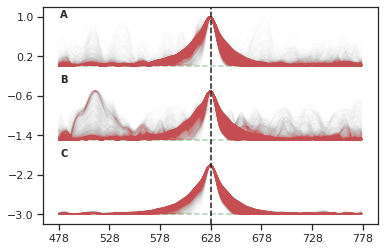

In [119]:
fig, ax = plt.subplots()
y_ax = [0,-1.5,-3]
for stencil_type in range(3):
    for curve in rscl_data[params["stencil_type"] == stencil_type,:]:
        ax.plot(curve+y_ax[stencil_type],'r', alpha=0.005)
ax.axvline(150,color='k',ls='--')
ax.hlines(y=[0,-1.5,-3],xmin=0,xmax=300, ls="--", color='g', alpha=0.5)

ax.set(xticks=np.arange(0,301,50),xticklabels=np.arange(478, 779,50), 
       yticks=np.linspace(1,-3, 6))#, yticklabels=[1,0,1,0,1,0])


ax.text(0.05,0.95, 'A', fontweight='bold', transform=ax.transAxes)
ax.text(0.05,0.65, 'B', fontweight='bold', transform=ax.transAxes)
ax.text(0.05, 0.31, 'C', fontweight='bold', transform=ax.transAxes)

plt.show()

# Rectangular patch

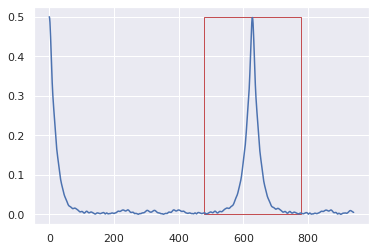

In [ ]:
# Create a Rectangle patch
fig,ax = plt.subplots()
ax.plot(rawdata[0,:-1])
rect = Rectangle((628-150, 0), 300, 0.5, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

In [ ]:
def get_ypred(curve, n_split: int):

    y = np.array(curve.tolist()*2).reshape(2,len(curve)) #repeate curve twice
    xax = np.arange(len(curve)//n_split) - (len(curve)//n_split)//2  #form x-axis
    feats = poly_featextract(y, [n_split],[3],True)  #get polynomial features
    partitions = [f"{n_split}_{j}" for j in range(1,n_split+1)] #get partitions
    ypreds, fitvals = [], []
    for counter, j in enumerate(partitions):
        col = [elem for elem in feats.columns if elem.startswith(j)]
        p1 = feats[col].iloc[0].values
        ypred = p1[0]*xax**3 + p1[1]*xax**2 + p1[2]*xax + p1[3]
        ypreds.append(ypred)
        fitvals.append(p1)
    return ypreds, fitvals

# 5 partitions

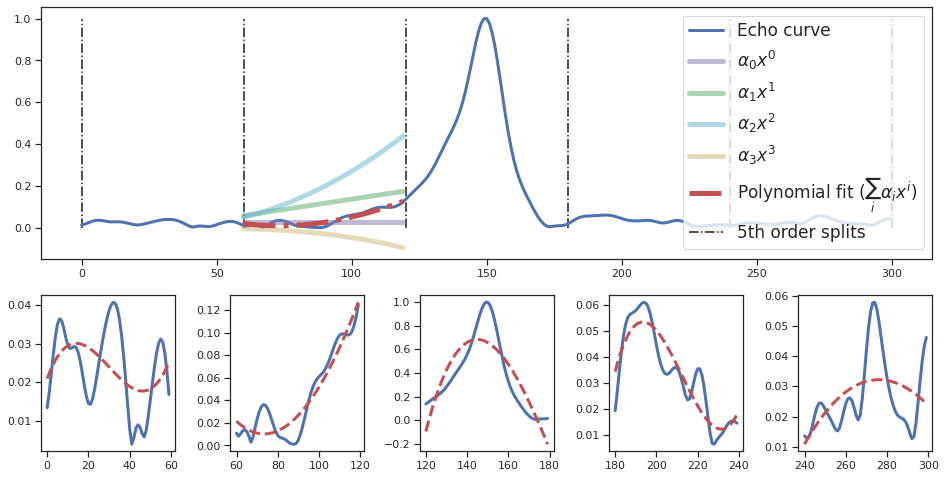

In [ ]:
y = np.array(curve.tolist()*2).reshape(2,len(curve))
curve = rscl_data[100,:]
ypreds, coeffs = get_ypred(curve,5)

sns.set_style('ticks')
fig = plt.figure(figsize=(14, 8), constrained_layout=False)

ax = fig.add_gridspec(5, 5)

ax1 = fig.add_subplot(ax[3:5,0])
ax2 = fig.add_subplot(ax[3:5,1])
ax3 = fig.add_subplot(ax[3:5,2])
ax4 = fig.add_subplot(ax[3:5,3])
ax5 = fig.add_subplot(ax[3:5,4])
ax6 = fig.add_subplot(ax[0:3, 0:5])
axes = [ax1, ax2, ax3, ax4, ax5]

for i,ax_no in enumerate(axes):
    ax_no.plot(np.arange(60*i, 60*(i+1)), curve[60*i : 60*(i+1)], lw=3)
    ax_no.plot(np.arange(60*i, 60*(i+1)), ypreds[i],'r--', lw=3)
    ax_no.set(xticks=np.arange(60*i, 60*(i+1)+1,20))

### axis 6
ax6.plot(curve, color='b', label='Echo curve', lw=3)
ax6.vlines(x=np.linspace(0,300,6).astype(int).tolist(),
          ymin=0,ymax=1, ls='-.', label='5th order splits')

## 2nd partition 
xax = np.arange(60,120)-30
ax6.plot(np.arange(60,120),[coeffs[1][3]]*60, color='m', lw=5, label=r'$\alpha _0 x^{0}$', alpha=0.5)
ax6.plot(np.arange(60,120),[coeffs[1][2]]*xax, color='g', lw=5, label=r'$\alpha _1 x^{1}$', alpha=0.5)
ax6.plot(np.arange(60,120),[coeffs[1][1]]*xax**2, color='c', lw=5, label=r'$\alpha _2 x^{2}$', alpha=0.5)
ax6.plot(np.arange(60,120),[coeffs[1][0]]*xax**3, color='y', lw=5, label=r'$\alpha _3 x^{3}$', alpha=0.5)
ax6.plot(np.arange(60,120), ypreds[1], color='r', ls='-.', lw=5, label=r'Polynomial fit ($\sum_i \alpha _i x^{i}$)')
ax6.legend(loc= "upper right", prop={'size': 17}, fontsize=20)


## Large axes titles

# fig.add_subplot(111, frame_on=False)
# plt.tick_params(labelcolor="none", bottom=False, left=False)
# plt.grid()
# plt.xlabel(r"Time $\mu$s", fontsize=20)
# plt.ylabel(r"Magnetization |M|", fontsize=24)

#plt.suptitle("Multiscale Polynomial Featurization", fontsize=20)
plt.tight_layout(rect=[0,0.1,0.95,0.95])
plt.show()

# All partitions

In [ ]:
curve = rscl_data[500,:]
y = np.array(curve.tolist()*2).reshape(2,len(curve))
ypreds4, coeffs4 = get_ypred(curve,4)
ypreds5, coeffs5 = get_ypred(curve,5)
ypreds10, coeffs10 = get_ypred(curve,10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:71: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


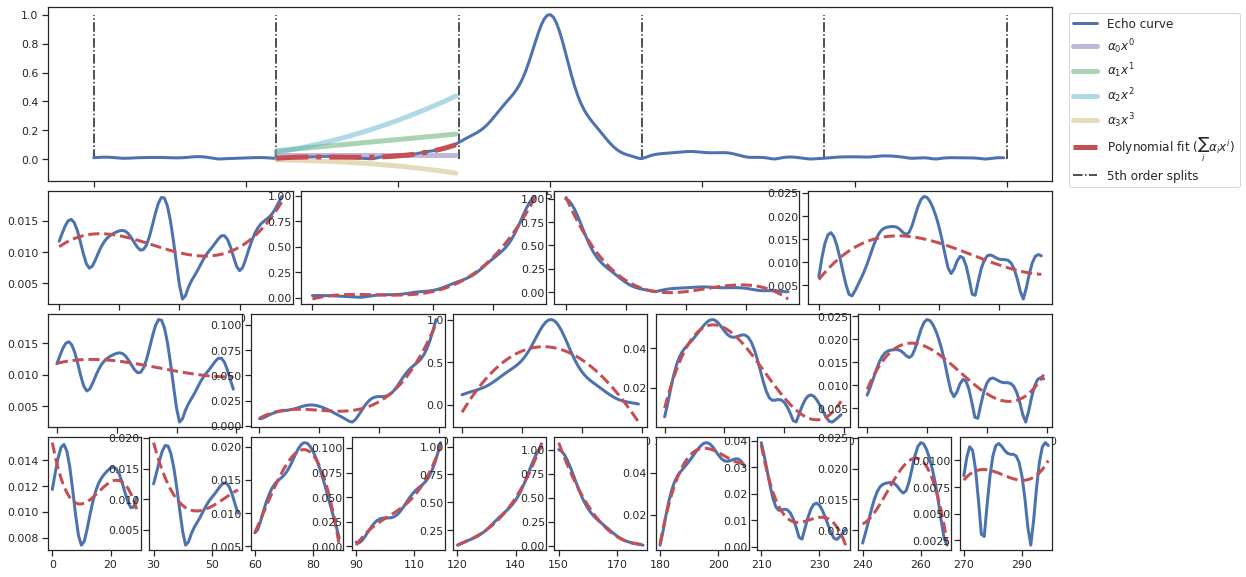

In [ ]:
sns.set_style('ticks')
fig = plt.figure(figsize=(18, 10), constrained_layout=False)

ax = fig.add_gridspec(9, 20)

#Main plot
ax1 = fig.add_subplot(ax[0:3,:])

# 4 partition
ax2 = fig.add_subplot(ax[3:5,0:5])
ax3 = fig.add_subplot(ax[3:5,5:10])
ax4 = fig.add_subplot(ax[3:5,10:15])
ax5 = fig.add_subplot(ax[3:5,15:20])
axes1 = [ax2, ax3, ax4, ax5]

# 5 partition
ax6 = fig.add_subplot(ax[5:7, 0:4])
ax7 = fig.add_subplot(ax[5:7, 4:8])
ax8 = fig.add_subplot(ax[5:7, 8:12])
ax9 = fig.add_subplot(ax[5:7, 12:16])
ax10 = fig.add_subplot(ax[5:7, 16:20])
axes2 = [ax6, ax7, ax8, ax9, ax10]

# 10 partitions
ax11 = fig.add_subplot(ax[7:9, 0:2])
ax12 = fig.add_subplot(ax[7:9, 2:4])
ax13 = fig.add_subplot(ax[7:9, 4:6])
ax14 = fig.add_subplot(ax[7:9, 6:8])
ax15 = fig.add_subplot(ax[7:9, 8:10])
ax16 = fig.add_subplot(ax[7:9, 10:12])
ax17 = fig.add_subplot(ax[7:9, 12:14])
ax18 = fig.add_subplot(ax[7:9, 14:16])
ax19 = fig.add_subplot(ax[7:9, 16:18])
ax20 = fig.add_subplot(ax[7:9, 18:20])
axes3 = [ax11, ax12, ax13, ax14,ax15,ax16,ax17,ax18,ax19,ax20]


### AXIS 1
ax1.plot(curve, color='b', label='Echo curve', lw=3)
ax1.vlines(x=np.linspace(0,300,6).astype(int).tolist(),
          ymin=0,ymax=1, ls='-.', label='5th order splits')

## 5-2nd partition 
xax = np.arange(60,120)-30
ax1.plot(np.arange(60,120),[coeffs[1][3]]*60, color='m', lw=5, label=r'$\alpha _0 x^{0}$', alpha=0.5)
ax1.plot(np.arange(60,120),[coeffs[1][2]]*xax, color='g', lw=5, label=r'$\alpha _1 x^{1}$', alpha=0.5)
ax1.plot(np.arange(60,120),[coeffs[1][1]]*xax**2, color='c', lw=5, label=r'$\alpha _2 x^{2}$', alpha=0.5)
ax1.plot(np.arange(60,120),[coeffs[1][0]]*xax**3, color='y', lw=5, label=r'$\alpha _3 x^{3}$', alpha=0.5)
ax1.plot(np.arange(60,120), ypreds5[1], color='r', ls='-.', lw=5, label=r'Polynomial fit ($\sum_i \alpha _i x^{i}$)')
ax1.legend(bbox_to_anchor=[1.01,1], prop={'size': 12}, fontsize=20)

### AXIS 2-5
for i,ax_no in enumerate(axes1):
    ax_no.plot(np.arange(75*i, 75*(i+1)), curve[75*i : 75*(i+1)], lw=3)
    ax_no.plot(np.arange(75*i, 75*(i+1)), ypreds4[i],'r--', lw=3)
    ax_no.set(xticks=np.arange(75*i, 75*(i+1)+1,20))


### AXIS 6-10
for i,ax_no in enumerate(axes2):
    ax_no.plot(np.arange(60*i, 60*(i+1)), curve[60*i : 60*(i+1)], lw=3)
    ax_no.plot(np.arange(60*i, 60*(i+1)), ypreds5[i],'r--', lw=3)
    ax_no.set(xticks=np.arange(60*i, 60*(i+1)+1,20))

### AXIS 101-20
for i,ax_no in enumerate(axes3):
    ax_no.plot(np.arange(30*i, 30*(i+1)), curve[30*i : 30*(i+1)], lw=3)
    ax_no.plot(np.arange(30*i, 30*(i+1)), ypreds10[i],'r--', lw=3)
    ax_no.set(xticks=np.arange(30*i, 30*(i+1)+1,20))

plt.tight_layout()
plt.show()

In [ ]:
np.linspace(0,300,11).astype(int)

array([  0,  30,  60,  90, 120, 150, 180, 210, 240, 270, 300])

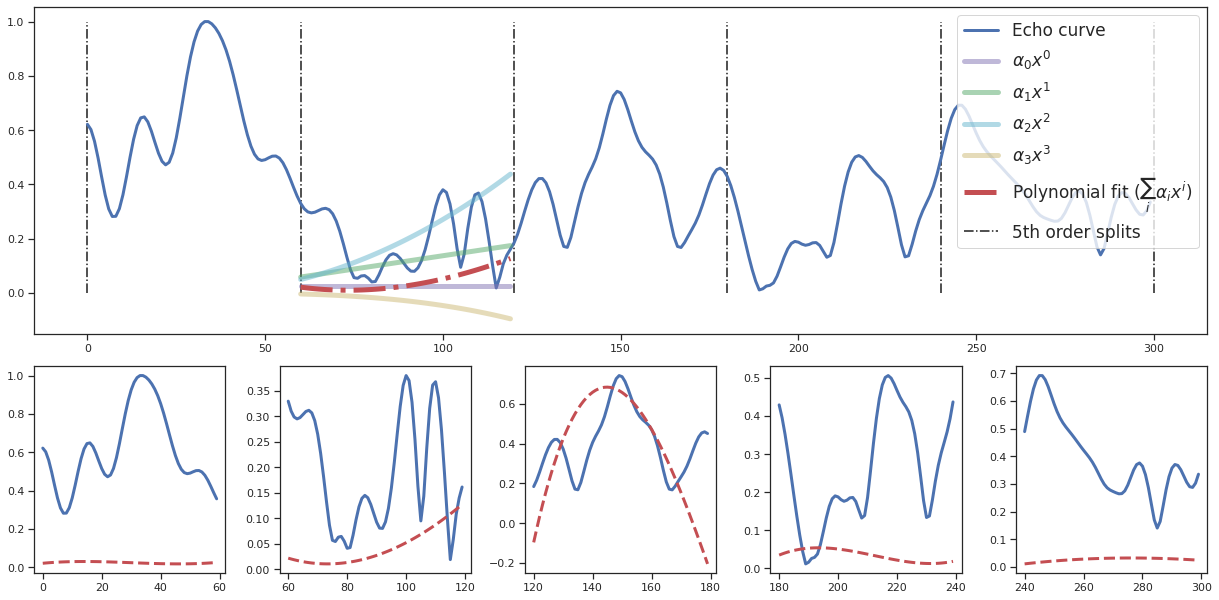

In [ ]:
sns.set_style('ticks')
fig = plt.figure(figsize=(18, 10), constrained_layout=False)

ax = fig.add_gridspec(5, 5)

ax1 = fig.add_subplot(ax[3:5,0])
ax2 = fig.add_subplot(ax[3:5,1])
ax3 = fig.add_subplot(ax[3:5,2])
ax4 = fig.add_subplot(ax[3:5,3])
ax5 = fig.add_subplot(ax[3:5,4])
ax6 = fig.add_subplot(ax[0:3, 0:5])
axes = [ax1, ax2, ax3, ax4, ax5]

for i,ax_no in enumerate(axes):
    ax_no.plot(np.arange(60*i, 60*(i+1)), curve[60*i : 60*(i+1)], lw=3)
    ax_no.plot(np.arange(60*i, 60*(i+1)), ypreds[i],'r--', lw=3)
    ax_no.set(xticks=np.arange(60*i, 60*(i+1)+1,20))

### axis 6
ax6.plot(curve, color='b', label='Echo curve', lw=3)
ax6.vlines(x=np.linspace(0,300,6).astype(int).tolist(),
          ymin=0,ymax=1, ls='-.', label='5th order splits')

## 2nd partition 
xax = np.arange(60,120)-30
ax6.plot(np.arange(60,120),[coeffs[1][3]]*60, color='m', lw=5, label=r'$\alpha _0 x^{0}$', alpha=0.5)
ax6.plot(np.arange(60,120),[coeffs[1][2]]*xax, color='g', lw=5, label=r'$\alpha _1 x^{1}$', alpha=0.5)
ax6.plot(np.arange(60,120),[coeffs[1][1]]*xax**2, color='c', lw=5, label=r'$\alpha _2 x^{2}$', alpha=0.5)
ax6.plot(np.arange(60,120),[coeffs[1][0]]*xax**3, color='y', lw=5, label=r'$\alpha _3 x^{3}$', alpha=0.5)
ax6.plot(np.arange(60,120), ypreds[1], color='r', ls='-.', lw=5, label=r'Polynomial fit ($\sum_i \alpha _i x^{i}$)')
ax6.legend(loc= "upper right", prop={'size': 17}, fontsize=20)


## Large axes titles

# fig.add_subplot(111, frame_on=False)
# plt.tick_params(labelcolor="none", bottom=False, left=False)
# plt.grid()
# plt.xlabel(r"Time $\mu$s", fontsize=20)
# plt.ylabel(r"Magnetization |M|", fontsize=24)

#plt.suptitle("Multiscale Polynomial Featurization", fontsize=20)
plt.tight_layout(rect=[0,0.1,0.95,0.95])
plt.show()

## Test out RF

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
pfeats = poly_featextract(rscl_data, [4,5,10], [3,3,3], True)

In [ ]:
xtrain ,xtest ,ytrain ,ytest = train_test_split(pfeats, y_classes['αz'], test_size=0.2, 
                                                random_state=1, stratify=params['stencil_type'])

In [ ]:
m = RandomForestRegressor(n_estimators=40, max_features=0.5, n_jobs=-1)

In [ ]:
m.fit(xtrain ,ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
m.score(xtest ,ytest)

0.9660799729148984

In [ ]:
fi = pd.DataFrame(np.array([pfeats.columns.tolist(), m.feature_importances_]).T,
             columns=['cols','fi'])
fi.fi = pd.to_numeric(fi.fi)

fi.sort_values('fi', ascending=False).head(10)

,cols,fi
37,10_1_2,0.180745
41,10_2_2,0.098297
53,10_5_2,0.073998
6,4_2_1,0.052257
47,10_3_0,0.039316
55,10_5_0,0.038701
75,10_10_0,0.036803
43,10_2_0,0.031591
50,10_4_1,0.026270
44,10_3_3,0.025644


# Testing Polyfeats

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
x = np.array((rscl_data[0,100:180]).tolist()*5).reshape(5,80)
xax = np.arange(len(x[0])) - len(x[0])//2

In [ ]:
pfits_x = poly_featextract(x, [1],[3],True)
pfits_x

,1_1_3,1_1_2,1_1_1,1_1_0
0,-0.000012,-0.000396,0.016544,0.659313
1,-0.000012,-0.000396,0.016544,0.659313
2,-0.000012,-0.000396,0.016544,0.659313
3,-0.000012,-0.000396,0.016544,0.659313
4,-0.000012,-0.000396,0.016544,0.659313


R2 score: 0.8710804343517128


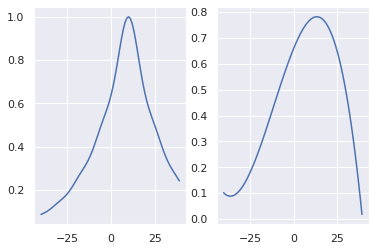

In [ ]:
plt.subplot(121)
plt.plot(xax, x[0])

plt.subplot(122)
p = pfits_x.iloc[0]
ypred = p[0]*xax**3 + p[1]*xax**2 + p[2]*xax + p[3]
plt.plot(xax, ypred )
print("R2 score:", r2_score(x[0], ypred ))